<a href="https://colab.research.google.com/github/nickforg2/FALL2021/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

##Here i have entered in 4 differing datasets that show some factors for why suicide is higher in certain areas of the world. These factors include human resources (Pscychologists, Doctors, therapists, etc.), Facilities (Hospitals, therapy offices, etc.),
## Age, and the rates of suicide. 

column_names = ['Country', 'Sex', '2016', '2015', '2010', '2000']



df = pd.read_csv("https://raw.githubusercontent.com/nickforg2/FALL2021/main/Age-standardized%20suicide%20rates.csv")
df_original = df.copy()

## this gives me a little look into the data i will be analyzing
df.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [ ]:
df.describe()

# here i wanted to get the stats for the data. I can see that the count is 549 which is wayyyyy tooo much data. Howveer, i cant delete it because i need to delete certain rows and it just all messed up.
# I can see the avg for each year doesnt vary too much and that indicates that the rates dont differ too far from each other year to year. 

,2016,2015,2010,2000
count,549.000000,549.000000,549.000000,549.000000
mean,9.792532,9.925683,10.544991,12.164117
std,7.469341,7.633241,8.620174,10.378318
min,0.000000,0.000000,0.000000,0.100000
25%,4.300000,4.400000,4.700000,5.100000
50%,7.900000,8.100000,8.400000,9.500000
75%,13.400000,13.300000,14.100000,16.000000
max,48.300000,51.500000,62.300000,85.800000


In [ ]:
#delete the 2000 column because i want to analyze data closer to the current year. However, it does add another layer of analysis by giving us insight on the rates in the past
df = df.drop(['2000'],axis = 1)
df_original = df.copy()

#reset column_names so that '2000', which was taken out is not in the edited column
column_names.remove('2000')

#check the type of each feature
df.info()


## here i can see i ahve 2 categorical data types and 3 numerical. This makes sense as country and sex should be objects whereas 2016, 2015, and 2010 should have rate values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  549 non-null    object 
 1   Sex      549 non-null    object 
 2   2016     549 non-null    float64
 3   2015     549 non-null    float64
 4   2010     549 non-null    float64
dtypes: float64(3), object(2)
memory usage: 21.6+ KB


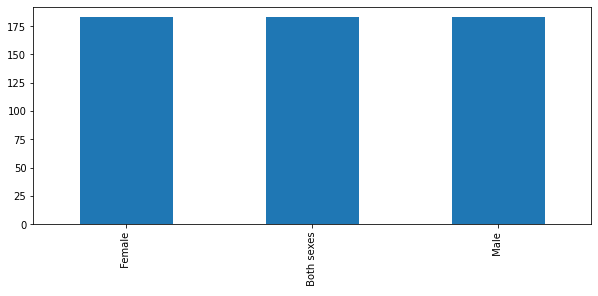

In [ ]:
plt.figure(figsize=(10,4))
df['Sex'].value_counts().plot(kind='bar', fontsize = 10)


#This visually shows the number of participants wihtin this study. For this particular visual, it shows we have 175 entries. This is 
#because each country has 3 different columns. 

In [ ]:
#checking to see if any of my data has nulls
#here i can see none of my data has any nulls which is ideal for me
df.isnull().sum()

Country    0
Sex        0
2016       0
2015       0
2010       0
2000       0
dtype: int64

In [ ]:
#Checking to see how much of my data is unique. In this case, i have 183 countries. IF you multiply that by 3 you get 549 entries which is perfect. We only have three choices for sex- male, female, and both sexes combined.
# And then for the years, we have varying data regarding the suicide rates in each country.

df.nunique()

Country    183
Sex          3
2016       214
2015       215
2010       227
dtype: int64

In [15]:
# here i am finding out how many entries each country has. Like i mentioned earlier, it is only 3.
#however, you can this goes on throughout the entire data set. I would like to dwindle this number down to one entry per country but i am not advanced 

print(df['Country'].value_counts())


Italy         3
Samoa         3
Cameroon      3
Finland       3
Armenia       3
             ..
Lesotho       3
Uzbekistan    3
Pakistan      3
Guyana        3
Senegal       3
Name: Country, Length: 183, dtype: int64


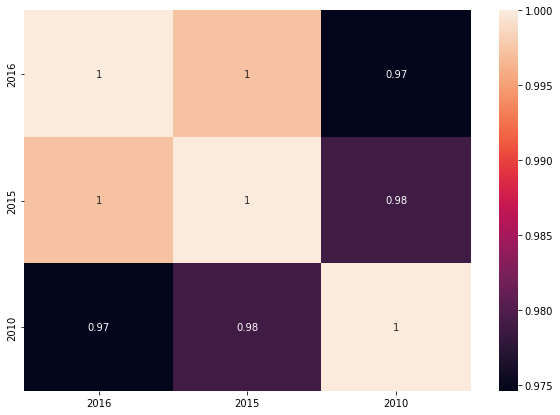

In [ ]:
#here i am showing a correlation matrix that depicts the correalation between each year and the suicide rates
#Here i can see that the rates in 2015 are closely related to those in 2016, which makes sense. As well as the rates dont differ to much from 2010-2016.
# the cool thing about these graphics is you can actually see the breakdown from a very fine window. MEaning, this map looks at the correalation from .975-1.00.

corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6950617510>,
      dtype=object)

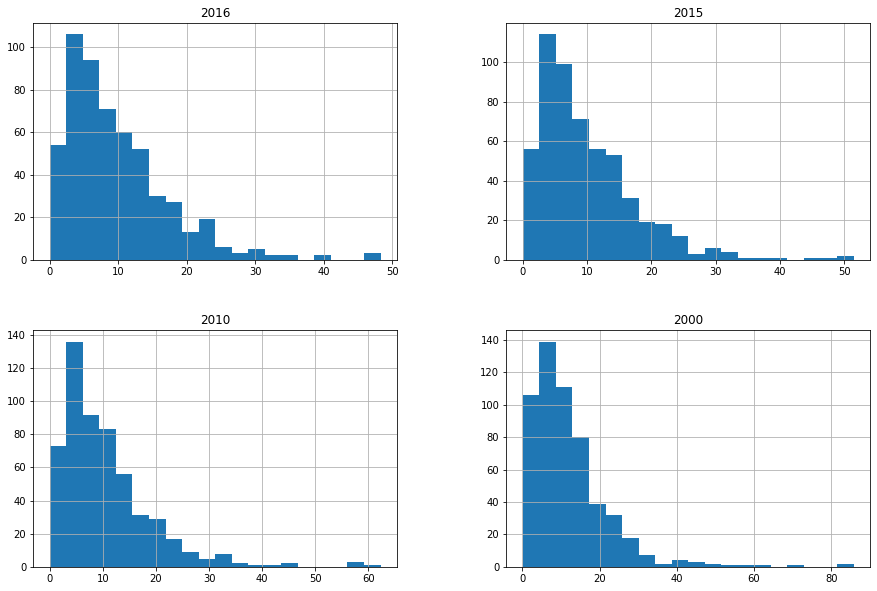

In [ ]:
# This graphic shows the varying rates and the years that accompany them. You can the differences from 2000-2016 and see the amount of people as well as the rate that is related to it. 

df.hist(figsize=(15,10), bins = 20, xlabelsize=10, ylabelsize=10)

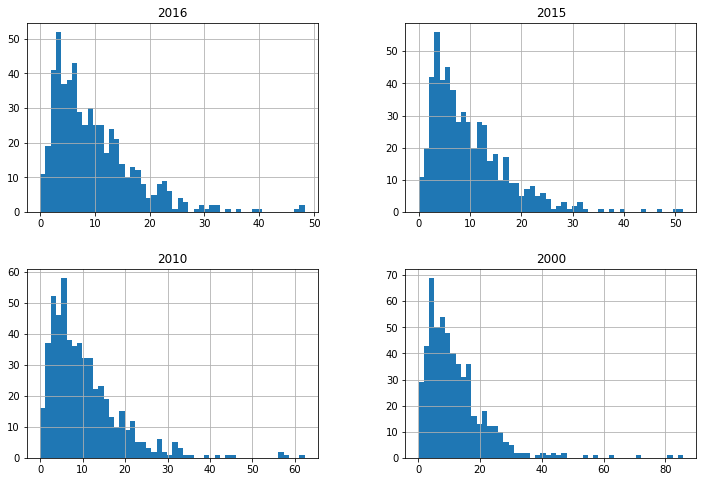

In [ ]:
#These charts show the numerical data for the years and the rates that relate to them. As you can see, the rates were actually higher in the past then they are now. 
# One thing i take away from this is, although the rates may be higher in different parts of the world, it seems that as time goes on, the rate dwindles. One explanation
#for this slight drop could be the spread of knowledge. Many people may be saved just by knowing there are other people out there like them. Prior to having,
#such easily accessible technology, people could not seek help through other methods. Nowadays, we can find advice for each situation and find millions of people who have felt something similar. To me
# this is a big reason for the drop off in the suicide rate.


df_numerical = df.drop(['Country'],axis = 1)

df_numerical.hist(bins=50, figsize=(12,8))
plt.show()

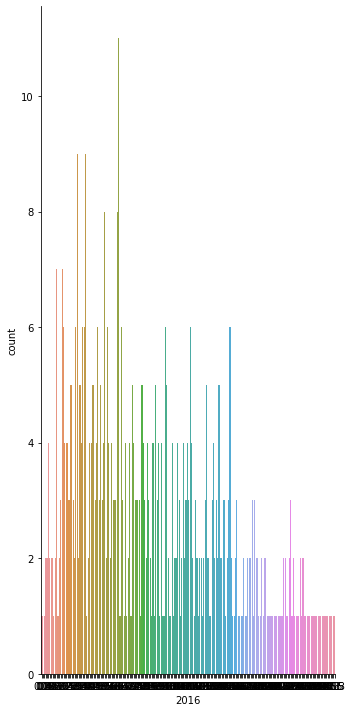

In [ ]:
#here, you can see a very large graph that depicts the rates byt country in the year 2016. You cannot view the country but its interesting to view the values in this format.

sns.catplot(x = '2016', data= df, kind ='count', height =10, aspect =.5)

In [ ]:
df_SI.drop([], axis = 1, inplace= True)

In [ ]:
from sklearn import preprocessing

#use the preprocessing MinMaxScaler to make the 
min_max_scaler = preprocessing.MinMaxScaler()

#fit_transform gives a numpy array
x_scaled = min_max_scaler.fit_transform(df_SI)

#put it back into a data frame and reassign the column names
df_scaled = pd.DataFrame(x_scaled)
df_scaled.columns = ['Country', 'Sex', '2016', '2015', '2010', '2000']

df_scaled.head()

NameError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression

#take out mpg, because that is what we are going to be studying
y = df_scaled['Country'].copy()
X = df_scaled.drop(['Country'], axis = 1)

lin_reg = LinearRegression().fit(X,y)
r_sq_Linear = lin_reg.score(X, y)

print("Linear model assessment: ", r_sq_Linear)

NameError: ignored

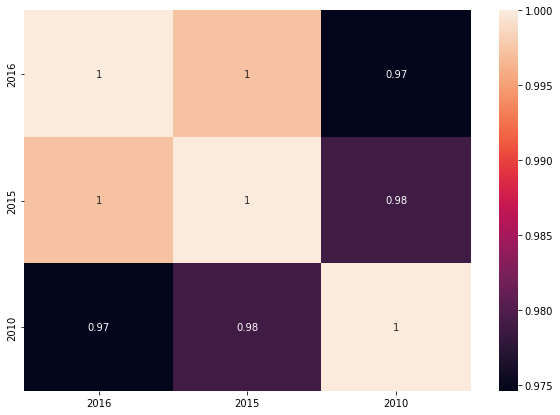

In [ ]:
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  549 non-null    object 
 1   Sex      549 non-null    object 
 2   2016     549 non-null    float64
 3   2015     549 non-null    float64
 4   2010     549 non-null    float64
 5   2000     549 non-null    float64
dtypes: float64(4), object(2)
memory usage: 25.9+ KB


In [ ]:
!pip install pandas_profiling --upgrade

Based on this overview below, i can see all of my data is there and there are no duplicates. This data, however, does not have much variance to it. One thing I noticed is, each country's suicide rate does not increase or decrease drastically and I think that may be the cause of the stagnant graphs. 

In [ ]:
#import pandas_profiling
#pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]